**INF2178 Assignment 1**\
**Chenyang Pan**\
**1005131554**

In [44]:
# run this code to upload the data
from google.colab import files
files_upload = files.upload()

Saving INF2178_A1_data.xlsx to INF2178_A1_data (2).xlsx


In [45]:
# Import needed packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
# read in the shelter data into dataframe
shelter_df = pd.read_excel('INF2178_A1_data.xlsx')

# **Data Examination and Cleaning**

In [47]:
# preview of the  data
shelter_df.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [48]:
# only keep revelant columns
shelter_df.drop(["OCCUPANCY_DATE", "ORGANIZATION_NAME", "PROGRAM_ID", "PROGRAM_NAME",
            "SECTOR", "PROGRAM_AREA", "OVERNIGHT_SERVICE_TYPE"], axis=1,  inplace = True)

In [49]:
# show first 10 rows of DF with selected columns
shelter_df.head(10)

,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Emergency,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,Emergency,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,Emergency,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,Emergency,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,Emergency,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,Emergency,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,Emergency,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,Emergency,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,Emergency,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,Emergency,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [50]:
# based on categorical varibles capacity type, take out only capacity type is
# "bed based capacity and remove capacity and occupied bed"
room_df = shelter_df[shelter_df["CAPACITY_TYPE"] != "Bed Based Capacity"].copy()
room_df.drop(["CAPACITY_ACTUAL_BED",	"OCCUPIED_BEDS", "CAPACITY_TYPE"], axis=1,  inplace = True)
# drop NA terms
room_df.dropna(inplace = True)
# add occupacy rate column
room_df["OCCUPANCY RATE"] = room_df["OCCUPIED_ROOMS"]/room_df["CAPACITY_ACTUAL_ROOM"]
# show room df
room_df.head(6)

,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY RATE
0,Emergency,74,29.0,26.0,0.896552
1,Emergency,3,3.0,3.0,1.000000
2,Emergency,24,28.0,23.0,0.821429
3,Emergency,25,17.0,17.0,1.000000
4,Emergency,13,14.0,13.0,0.928571
6,Emergency,120,46.0,44.0,0.956522


In [51]:
# based on categorical varibles capacity type, take out only capacity type is
# "bed based capacity and remove capacity and occupied bed"
bed_df = shelter_df[shelter_df["CAPACITY_TYPE"] != "ROOM Based Capacity"].copy()
bed_df.drop(["CAPACITY_ACTUAL_ROOM",	"OCCUPIED_ROOMS", "CAPACITY_TYPE"], axis=1,  inplace = True)
# drop NA terms
bed_df.dropna(inplace = True)
# add occupacy rate column
bed_df["OCCUPANCY RATE"] = bed_df["OCCUPIED_BEDS"]/bed_df["CAPACITY_ACTUAL_BED"]
# show room df
bed_df.head(6)

,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,OCCUPANCY RATE
5,Emergency,6,8.0,6.0,0.750000
10,Emergency,22,24.0,22.0,0.916667
11,Emergency,8,12.0,8.0,0.666667
21,Transitional,10,12.0,10.0,0.833333
25,Emergency,11,12.0,11.0,0.916667
29,Transitional,32,32.0,32.0,1.000000


# ****Exploratory Data Analysis (EDA)****

In [52]:
# summary statistic of categorical varibles
shelter_df['count'] = 1
shelter_df.pivot_table(values='count', index='PROGRAM_MODEL', aggfunc='sum')

,count
PROGRAM_MODEL,
Emergency,41541
Transitional,9401


In [53]:
# proportion of each model
emer = round(41541/(41541+9401) * 100, 2)
trans = round(9401/(41541+9401) * 100, 2)
print("percentage of emergency: {}%".format(emer))
print("percentage of transitional: {}%".format(trans))

percentage of emergency: 81.55%
percentage of transitional: 18.45%


In [54]:
shelter_df.pivot_table(values='count', index='CAPACITY_TYPE', aggfunc='sum')

,count
CAPACITY_TYPE,
Bed Based Capacity,32399
Room Based Capacity,18545


In [57]:
# proportion of each capcacity type
bed = round(32399/(32399+18545) * 100, 2)
room = round(18545/(32399+18545) * 100, 2)
print("percentage of bed type: {}%".format(bed))
print("percentage of room type: {}%".format(room))

percentage of bed type: 63.6%
percentage of room type: 36.4%


In [58]:
# calculate numerical summary statistic by capacity type
# code refers to INF2178 Lecture
def get_summary_statistics(dataset, category):

    mean = np.round(np.mean(dataset), 3)
    median = np.round(np.median(dataset), 3)
    min_value = np.round(dataset.min(), 3)
    max_value = np.round(dataset.max(), 3)
    quartile_1 = np.round(dataset.quantile(0.25), 3)
    quartile_3 = np.round(dataset.quantile(0.75), 3)
    spread = max_value-min_value
    sd = np.round(dataset.std(), 3)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 3)

    print('\n\n{} summary statistics'.format(category))
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('spread: %s' % spread)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('standard deviation: %s' % sd)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [59]:
# summary statistic of only room type capacity
# summary stat for User service count
get_summary_statistics(room_df["SERVICE_USER_COUNT"], "SERVICE USER COUNT for Room based")



SERVICE USER COUNT for Room based summary statistics
Min: 1
Mean: 73.587
Max: 339
spread: 338
25th percentile: 22.0
Median: 47.0
standard deviation: 73.319
75th percentile: 96.0
Interquartile range (IQR): 74.0


In [60]:
# summary stat for capacity actual room
get_summary_statistics(room_df["CAPACITY_ACTUAL_ROOM"], "capacity actual room")



capacity actual room summary statistics
Min: 1.0
Mean: 55.549
Max: 268.0
spread: 267.0
25th percentile: 19.0
Median: 35.0
standard deviation: 59.449
75th percentile: 68.0
Interquartile range (IQR): 49.0


In [61]:
# summary stat for Occupied rooms
get_summary_statistics(room_df["OCCUPIED_ROOMS"], "Occupied rooms")



Occupied rooms summary statistics
Min: 1.0
Mean: 52.799
Max: 268.0
spread: 267.0
25th percentile: 16.0
Median: 34.0
standard deviation: 58.793
75th percentile: 66.0
Interquartile range (IQR): 50.0


In [62]:
# summary stat for room occupancy rate
get_summary_statistics(room_df["OCCUPANCY RATE"], "room occupancy rate")



room occupancy rate summary statistics
Min: 0.012
Mean: 0.934
Max: 1.014
spread: 1.002
25th percentile: 0.958
Median: 1.0
standard deviation: 0.163
75th percentile: 1.0
Interquartile range (IQR): 0.042


In [63]:
# summary statistic of only bed type capacity
# summary stat for User service count
get_summary_statistics(bed_df["SERVICE_USER_COUNT"], "SERVICE USER COUNT for bed based")



SERVICE USER COUNT for bed based summary statistics
Min: 1
Mean: 29.781
Max: 234
spread: 233
25th percentile: 14.0
Median: 23.0
standard deviation: 26.38
75th percentile: 41.0
Interquartile range (IQR): 27.0


In [64]:
# summary stat for capacity actual bed
get_summary_statistics(bed_df["CAPACITY_ACTUAL_BED"], "capacity actual bed")



capacity actual bed summary statistics
Min: 1.0
Mean: 31.628
Max: 234.0
spread: 233.0
25th percentile: 15.0
Median: 25.0
standard deviation: 27.128
75th percentile: 43.0
Interquartile range (IQR): 28.0


In [65]:
# summary stat for occupied beds
get_summary_statistics(bed_df["OCCUPIED_BEDS"], "Occupied beds")



Occupied beds summary statistics
Min: 1.0
Mean: 29.781
Max: 234.0
spread: 233.0
25th percentile: 14.0
Median: 23.0
standard deviation: 26.38
75th percentile: 41.0
Interquartile range (IQR): 27.0


In [67]:
# summary stat for bed occupancy rate
get_summary_statistics(bed_df["OCCUPANCY RATE"], "bed occupancy rate")



bed occupancy rate summary statistics
Min: 0.023
Mean: 0.928
Max: 1.0
spread: 0.977
25th percentile: 0.9
Median: 1.0
standard deviation: 0.123
75th percentile: 1.0
Interquartile range (IQR): 0.1


Text(0.5, 0, 'Prorgam model')

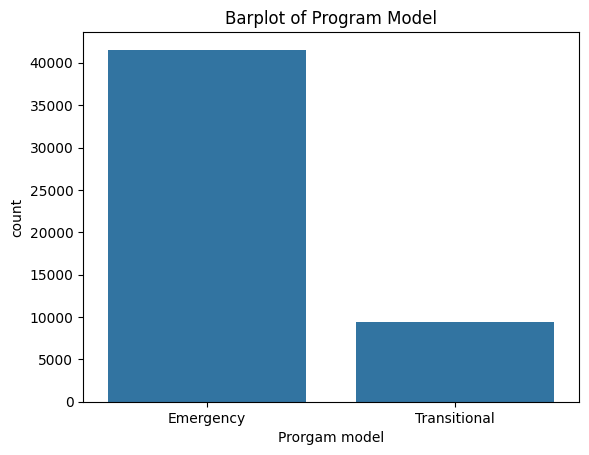

In [68]:
# barplot of program model
sns.countplot(data= shelter_df, x='PROGRAM_MODEL')
plt.title('Barplot of Program Model')
plt.xlabel('Prorgam model')

Text(0.5, 0, 'Capcity type')

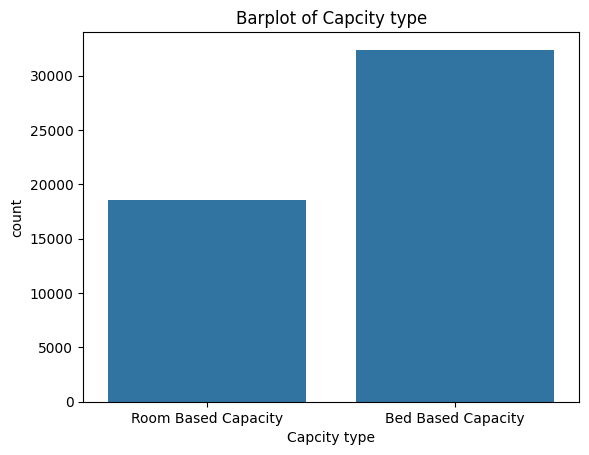

In [69]:
# barplot of capacity type
sns.countplot(data= shelter_df, x='CAPACITY_TYPE')
plt.title('Barplot of Capcity type')
plt.xlabel('Capcity type')

Text(0.5, 9.444444444444438, 'room occupancy rate')

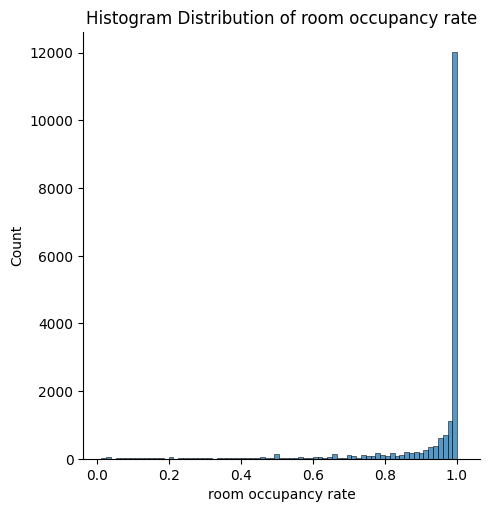

In [70]:
#histograms
# Histogram Distribution of room occupancy rate
sns.displot(room_df["OCCUPANCY RATE"], bins=75)
plt.title('Histogram Distribution of room occupancy rate')
plt.xlabel('room occupancy rate')

Text(0.5, 9.444444444444438, 'bed occupancy rate')

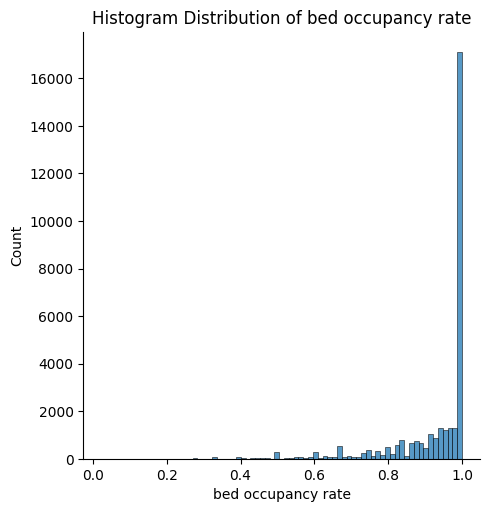

In [71]:
# Histogram Distribution of bed occupancy rate
sns.displot(bed_df["OCCUPANCY RATE"], bins=75)
plt.title('Histogram Distribution of bed occupancy rate')
plt.xlabel('bed occupancy rate')

Text(0.5, 9.444444444444438, 'Service user count')

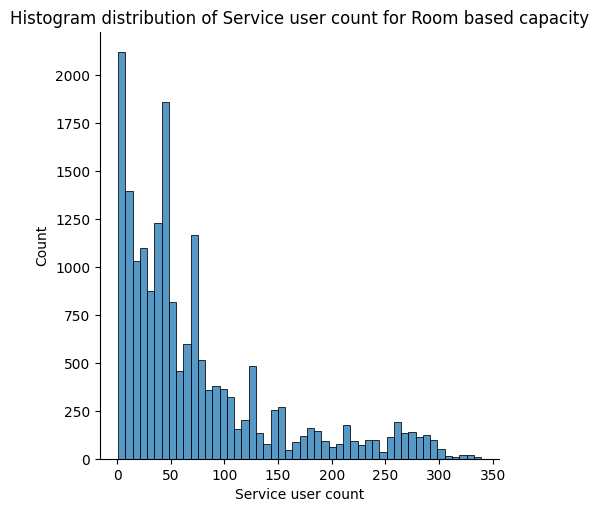

In [72]:
# Histogram distribution of Service user count for Room based capacity
sns.displot(room_df["SERVICE_USER_COUNT"], bins=50)
plt.title('Histogram distribution of Service user count for Room based capacity')
plt.xlabel('Service user count')

Text(0.5, 9.444444444444438, 'Service user count')

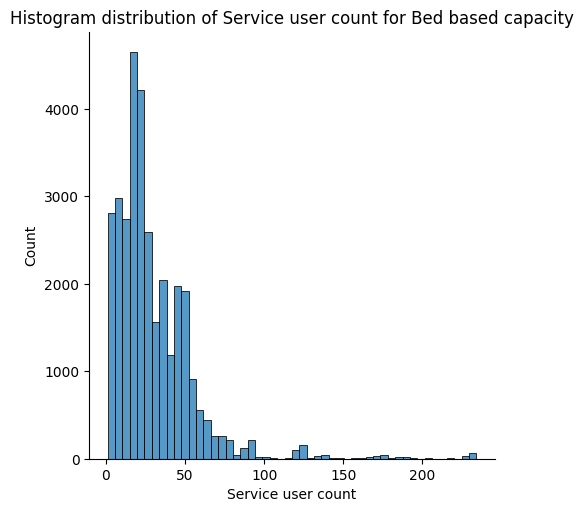

In [73]:
# Histogram distribution of Service user count for Bed based capacity
sns.displot(bed_df["SERVICE_USER_COUNT"], bins=50)
plt.title('Histogram distribution of Service user count for Bed based capacity')
plt.xlabel('Service user count')

Text(0, 0.5, 'Service User Count')

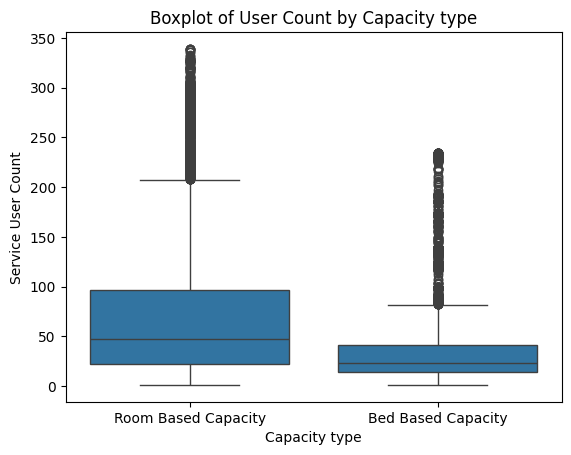

In [75]:
# boxplot of service users by capacity type
sns.boxplot(x = "CAPACITY_TYPE", y = "SERVICE_USER_COUNT", data = shelter_df)
plt.title('Boxplot of User Count by Capacity type')
plt.xlabel('Capacity type')
plt.ylabel("Service User Count")

Text(0.5, 0, 'capacity actual room')

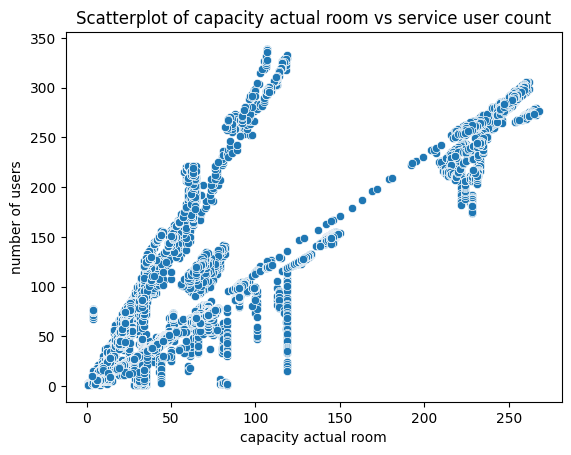

In [76]:
# Scatterplot of capacity actual room vs service user count
sns.scatterplot(x=room_df["CAPACITY_ACTUAL_ROOM"], y= room_df["SERVICE_USER_COUNT"])
plt.title('Scatterplot of capacity actual room vs service user count')
plt.ylabel('number of users')
plt.xlabel('capacity actual room')

Text(0.5, 0, 'capacity actual bed')

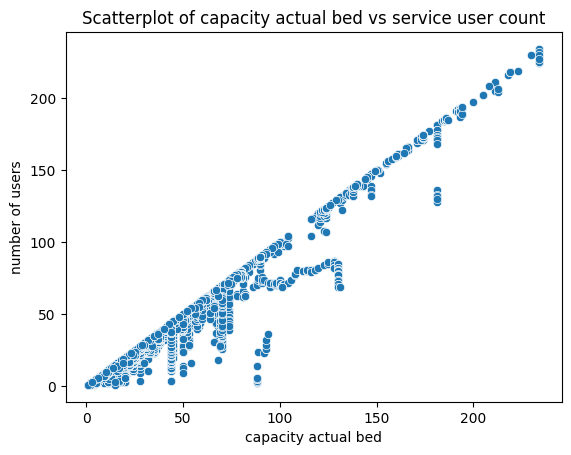

In [77]:
# Scatterplot of capacity actual bed vs service user count
sns.scatterplot(x=bed_df["CAPACITY_ACTUAL_BED"], y= bed_df["SERVICE_USER_COUNT"])
plt.title('Scatterplot of capacity actual bed vs service user count')
plt.ylabel('number of users')
plt.xlabel('capacity actual bed')

**Narrative about Data After EDA:**

From the selected features which we are interested, program model and capacity type are categorical variables, there are 41541 number of Emergency and 9401 are transitional, that means, the proportion of Emergency and transitional are 81.55% and 18.45 percent, this tells us that majority of program model is emergency. For capacity type, there are 32399 bed based capacity and 18545 room based capacity. The proportion is 63.6% and 36.4% in percentage respectively. This shows that there are more bed based capacity shelters in the city. The numerical variables are service user count, capacity actual room, occupied rooms,capacity actual bed, occupied beds and occupancy rate. From the summary statistics, we realize that the mean number of service users for room capacity, 73.6, is greater than the mean number of service users of bed capacity. This gives us some insight that room based shelters can accept more homeless people than bed based capacity but bed based capacity programs are much more than room based capacity in the city. However, we have found a similar mean occupancy rate for both room based and bed based capacity with room based capacity being slightly higher (0.934>0.927). We also found the spread, standard deviation and IQR for actual bed capacity and bed occupied in bed based capacity is smaller than actual room capacity and rooms occupied in room based capacity. Moreover, the standard deviation and spread of the occupancy rate for room based capacity is greater than bed based capacity.  But one interesting thing is that the IQR of occupancy rate for bed based capacity is larger than room based capacity.

The barplot of the program model and the barplot of the capacity type once again shows the huge visual difference of number between each type. Especially the huge sample size difference between the emergency and transitional model, the large difference in sample size may lead to very inaccurate results if we compare these two different models.

Looking at the histograms, we found that the histogram distribution for both occupancy rate of room based capacity and bed based capacity are left skewed, which once again tells us whether room based capacity or bed based capacity, the overall  occupancy rate are very closed to 1, which means in most of situation, the shelters are full. For histogram of service users count for room and bed based capacity, they both show right skewed, however, the histogram once again shows most homeless can be accepted by the room based capacity shelter.

From the side by side boxplots of service user count by capacity type, we can observe that there are many outliers for user count of both capacity types. The boxplots show visually the IQR and median user of the room based capacity is larger than the bed based capacity.

From two Scatterplots, capacity actual room vs services user count of room type shelter and capacity actual room vs services user count of bed type shelter, we can observe strong positive correlation in both plots, which may imply that homeless people are willing to enter shelter once there are more spaces.


# **T-Test**

**Welch's T-test, one sided**

Null hypothesis: The average user of room type capacity and bed type capacity are the same\
Alternative hypothesis: The average users of room type capacity is greater than bed type capacity users

In [78]:
# Welch's T-test, one sided
x = room_df["SERVICE_USER_COUNT"]
y = bed_df["SERVICE_USER_COUNT"]
t_stat, p_val = stats.ttest_ind(x, y,alternative= "greater", equal_var = False)
print("t statistic: {}".format(t_stat))
print("p value : {}".format(p_val))

t statistic: 78.50641490763628
p value : 0.0


**Two sample one sided t-test**

Null hypothesis: The occupancy rate of two types of capacities are the same\
Alternative hypothesis: The occupancy rate of room based capacity type is greater than bed type

In [120]:
# Two sample one sided t-test
x = room_df["OCCUPANCY RATE"]
y = bed_df["OCCUPANCY RATE"]
t_stat, p_val = stats.ttest_ind(x, y, alternative= "greater")
print("t statistic: {}".format(t_stat))
print("p value : {}".format(p_val))

t statistic: 4.845858377006688
p value : 6.321780679079661e-07
